In [14]:
from sqlalchemy import create_engine, text
from sqlalchemy.orm import sessionmaker

# Database connection settings.
DB_HOST = "192.168.1.103"
DB_PORT = "5432"
DB_NAME = "Capstone"
DB_USER = "postgres"
DB_PASSWORD = "Google#13"

# Create engine and session.
engine = create_engine(
    f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}",
    pool_size=20,
    max_overflow=40
)
Session = sessionmaker(bind=engine)
session = Session()

In [15]:
from sqlalchemy import create_engine, MetaData, Table
from sqlalchemy.orm import sessionmaker
import matplotlib.pyplot as plt
import pandas as pd


                 user_id  user_lifetime_days review_frequency avg_rating
0  118446717614999951016                   1             1.00       5.00
1  118446725185281394757                   1             1.00       3.00
2  118446696946959024765                   1             1.00       1.00
3  118446703820689773600                   1             1.00       5.00
4  118446683655957264030                   1             1.00       5.00


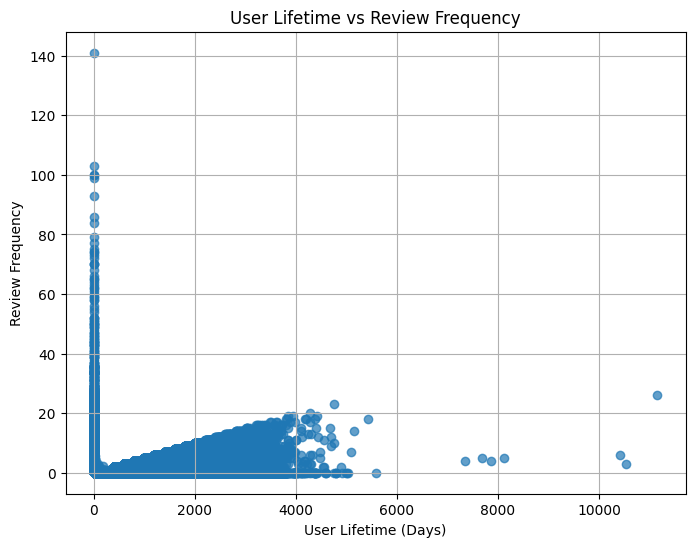

In [ ]:

metadata = MetaData()
users = Table('users', metadata, autoload_with=engine)
query = session.query(
    users.c.user_id,
    users.c.user_lifetime_days,
    users.c.review_frequency,
    users.c.avg_rating
)
results = query.all()

df = pd.DataFrame(results, columns=["user_id", "user_lifetime_days", "review_frequency",'avg_rating'])
print(df.head())

plt.figure(figsize=(8, 6))
plt.scatter(df['user_lifetime_days'], df['review_frequency'], alpha=0.7)
plt.xlabel('User Lifetime (Days)')
plt.ylabel('Review Frequency')
plt.title('User Lifetime vs Review Frequency')
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, MetaData, Table




In [20]:
df

,user_id,user_lifetime_days,review_frequency,avg_rating
0,118446717614999951016,1,1.00,5.00
1,118446725185281394757,1,1.00,3.00
2,118446696946959024765,1,1.00,1.00
3,118446703820689773600,1,1.00,5.00
4,118446683655957264030,1,1.00,5.00
...,...,...,...,...
1310065,118446604858443441367,1,1.00,5.00
1310066,118446604894210556660,1,1.00,1.00
1310067,118446619138037728801,1,1.00,4.00
1310068,118446619236978110718,1,1.00,5.00


In [ ]:
metadata = MetaData()
business = Table('business', metadata, autoload_with=engine)
query = session.query(
business.c.gmap_id,
business.c.avg_rating,
business.c.num_of_reviews
)

businesses = query.all()

df = pd.DataFrame(businesses, columns=["gmap_id", "avg_rating", "num_of_reviews"])



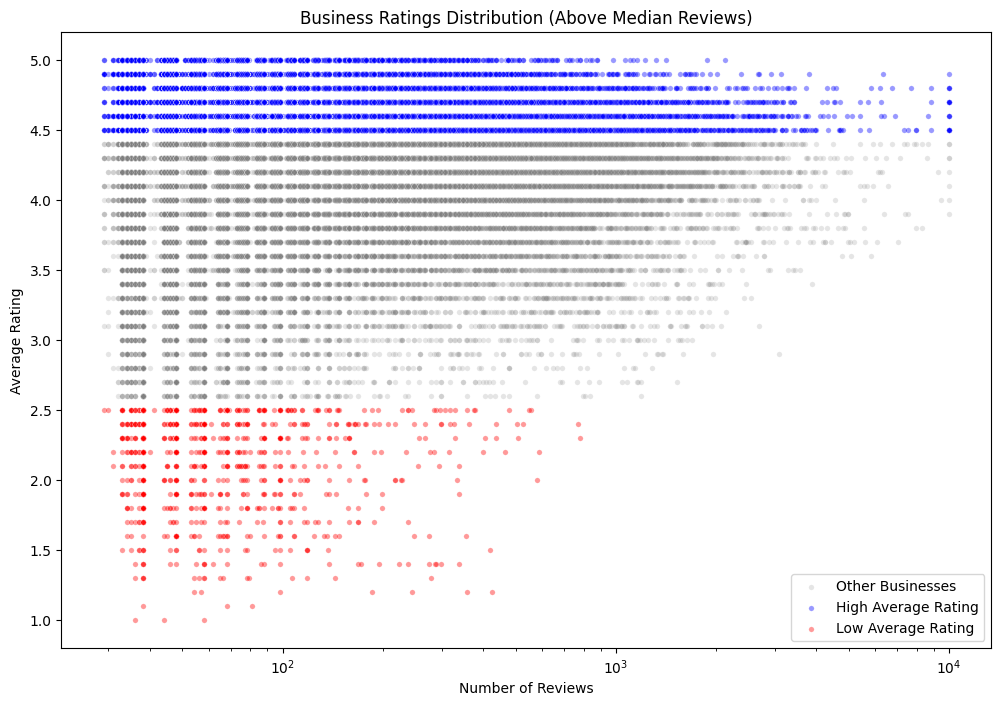

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define thresholds.
median_num_of_reviews = df['num_of_reviews'].median()
high_avg_rating_threshold = 4.5  # Adjust threshold as needed.
low_avg_rating_threshold = 2.5   # Adjust threshold as needed.

# Filter businesses with reviews greater than median
df_above_median = df[df['num_of_reviews'] > median_num_of_reviews]

# Filter businesses.
many_reviews_high_avg_rating = df_above_median[df_above_median['avg_rating'] >= high_avg_rating_threshold]
many_reviews_low_avg_rating = df_above_median[df_above_median['avg_rating'] <= low_avg_rating_threshold]

# Create a mask for other businesses (above median but not in high or low categories)
other_businesses = df_above_median[
    (df_above_median['avg_rating'] < high_avg_rating_threshold) & 
    (df_above_median['avg_rating'] > low_avg_rating_threshold)
]

# Plotting
plt.figure(figsize=(12, 8))

# Other businesses
sns.scatterplot(
    x=other_businesses['num_of_reviews'],
    y=other_businesses['avg_rating'],
    s=15,  # Point size
    alpha=0.2,  # Transparency
    color='gray',  # Color for other businesses
    label='Other Businesses'
)

# High avg rating businesses
sns.scatterplot(
    x=many_reviews_high_avg_rating['num_of_reviews'],
    y=many_reviews_high_avg_rating['avg_rating'],
    s=15,  # Point size
    alpha=0.4,  # Transparency
    color='blue',  # Color for high avg rating businesses
    label='High Average Rating'
)

# Low avg rating businesses
sns.scatterplot(
    x=many_reviews_low_avg_rating['num_of_reviews'],
    y=many_reviews_low_avg_rating['avg_rating'],
    s=15,  # Point size
    alpha=0.4,  # Transparency
    color='red',  # Color for low avg rating businesses
    label='Low Average Rating'
)

plt.title('Business Ratings Distribution (Above Median Reviews)')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.xscale('log')  # Use log scale for x-axis to better visualize the distribution
plt.legend()
plt.show()
